### Dependencies

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from wordcloud import WordCloud, STOPWORDS

In [74]:
def get_random_rgb():
    """
        Function to generate rangom rgb values 
        two random values increase the etropy
        returns: rgb values as a tuple 
    """
    r = random.randint(0, 255) 
    g = random.randint(0, 255) 
    b = random.randint(0, 255) 
    rgb = (r,g,b)
    return rgb

In [19]:
## read the csv files, although we will look into train data only
df_train = pdwordcloudad_csv("../dataset/train.csv")
df_test = pd.read_csv("../dataset/test.csv")

### 1. Class Distribution
- Why Class Distribution ?
    - To get number of classes 
    - To check whther data is imbalanced or not

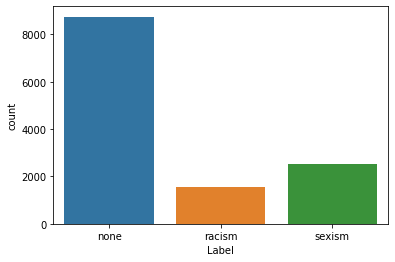

In [27]:
ax = sns.countplot(x="Label", data=df_train)

##### Data seems bit imbalanced 
##### Possible solutions 
- Undersampling (reduces the train size)
- Data Augmentation (Hard)

### 2. Lexical Analysis
- Is there any corelation bw lexical features and labels
- Should we use those lexical and treat it as multimodal problem ?


In [66]:
# Pandas Series for each flair
labels = df_train.Label.unique()
labels_series = []
for label in labels:
    labels_series.append(df_train[df_train.Label==label].Tweets)

In [65]:
df_train['word_count'] = df_train['Tweets'].apply(lambda comment: len(comment.split()))
df_train['char_count'] = df_train['Tweets'].apply(len) 
df_train['word_density'] = df_train['char_count']/df_train['word_count']

#### 3.1 Word Count Distirbution

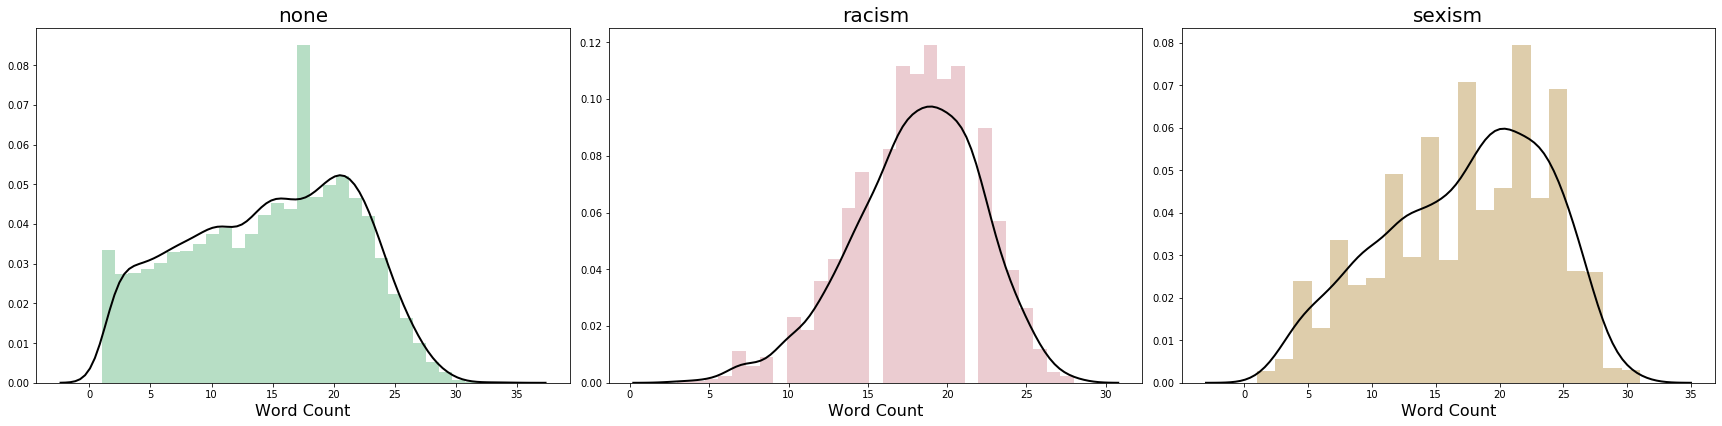

In [71]:
fig=plt.figure(figsize=(24, 6))
columns = 3
rows = 1
for i, label in zip(range(1, columns*rows +1), labels):
    fig.add_subplot(rows, columns, i)
    ax = sns.distplot(
        df_train.word_count[df_train.Label==label], 
        hist_kws={"linewidth": 2, "color":'#%02x%02x%02x' % get_random_rgb()}, 
        kde_kws={"linewidth":2, "color":'black'}, 
    )
    ax.set_title(list(labels)[i-1], fontdict ={'fontsize':20})
    ax.set_xlabel("Word Count", fontdict ={'fontsize':16})
plt.tight_layout(pad=1)
plt.show()

#### 3.2 Word Density Distirbution

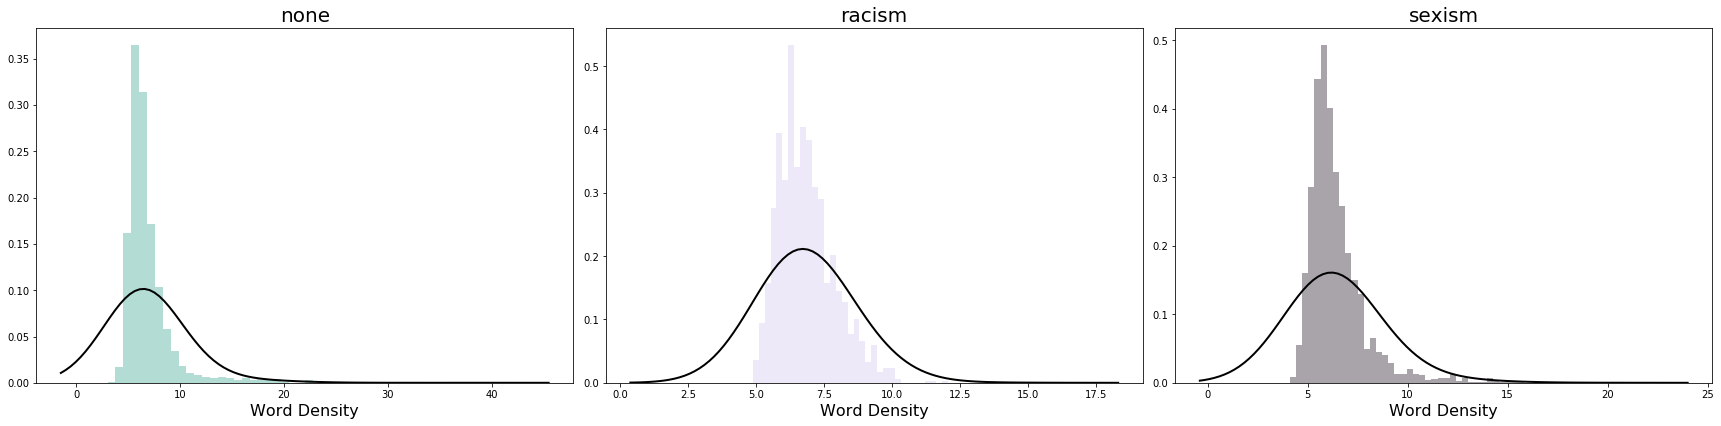

In [73]:
# word density distribution of each label
fig=plt.figure(figsize=(24, 6))
columns = 3
rows = 1
for i, label in zip(range(1, columns*rows +1), labels):
    fig.add_subplot(rows, columns, i)
    ax = sns.distplot(
        df_train.word_density[df_train.Label==label], 
        hist_kws={"linewidth": 2, "color":'#%02x%02x%02x' % get_random_rgb()}, 
        kde_kws={"linewidth":2, "color":'black', "bw":1.5},
    )
    ax.set_title(list(labels)[i-1], fontdict ={'fontsize':20})
    ax.set_xlabel("Word Density", fontdict ={'fontsize':16})
plt.tight_layout(pad=1)
plt.show()

#### Observation
- Indeed there's discrepancy in different lexical feature disctirbution which might be useful and we can treat this problem as multimodal, but it is also important to note that if we use these lexical features in modelling it might induce bias in the system because we will be making an assumption based on these lexical features ie: If word count is higher it is likely to be racist which is not neccessarily true
- Word density distribution seems pretty similar hence it is hard to distinguish the tweet based on word density

### 3. Word Cloud
- Why word cloud ?
    - Word cloud will help us to understand discriminative features better
    - It will also help us to understand the vocab  

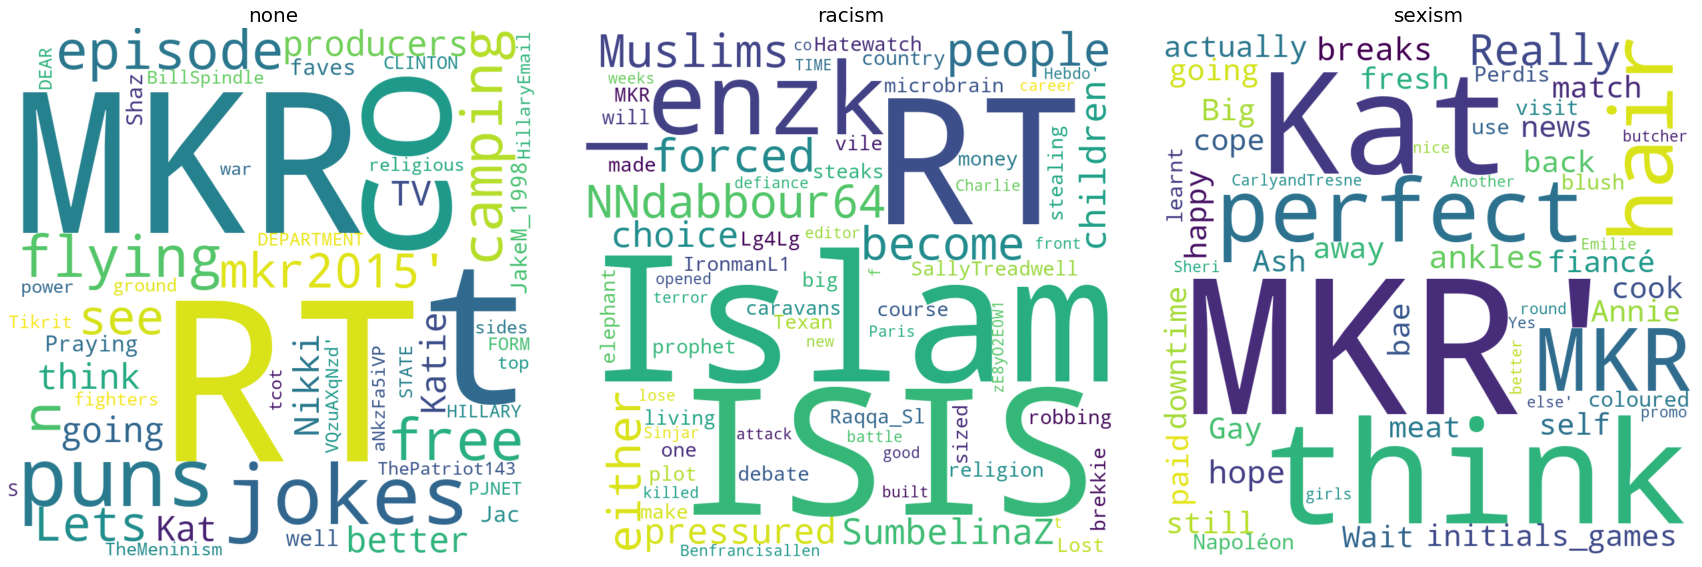

In [62]:
fig=plt.figure(figsize=(24, 24))
columns = 3
rows = 1
for i, pds in zip(range(1, columns*rows +1), labels_series):
    text = pds.values
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = STOPWORDS).generate(str(text))
    fig.add_subplot(rows, columns, i)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(list(labels)[i-1], fontdict ={'fontsize':20})
    plt.tight_layout(pad=2)
    plt.axis('off')
#
plt.show()